#### importing libraries

In [513]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

#### importing dataset

In [514]:
from sklearn.datasets import load_iris
iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Extracting independant and dependant variables

In [515]:
x = iris_df.iloc[:, :-1]
y = iris_df.iloc[:, -1]

#### Normalise data

In [516]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit(x).transform(x.astype(float))
x[0:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

#### Splitting the dataset into train and test

In [517]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#### Fitting KNN to the training set

In [518]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
KNN_classifier.fit(x_train, y_train)

KNeighborsClassifier()

#### Predicting the test_results

In [519]:
y_predicted = KNN_classifier.predict(x_test)
y_predicted

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

#### Evaluation of the model

In [520]:
from sklearn import metrics
print("Train set accuracy:", metrics.accuracy_score(y_train, KNN_classifier.predict(x_train)))
print("Test set accuracy:", metrics.accuracy_score(y_test, y_predicted))

Train set accuracy: 0.9583333333333334
Test set accuracy: 1.0


In [521]:
metrics.confusion_matrix(y_train, KNN_classifier.predict(x_train))

array([[39,  0,  0],
       [ 0, 34,  3],
       [ 0,  2, 42]], dtype=int64)

In [522]:
metrics.confusion_matrix(y_test, y_predicted)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [523]:
from sklearn.model_selection import cross_val_score
Ks = 20
accuracy_rate = []
for n in range(1, Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train, y_train)
    score = cross_val_score(neigh, x, y, cv=10)
    accuracy_rate.append(score.mean())

In [524]:
error_rate = []
for i in range(1, 40):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train, y_train)
    pred_i = neigh.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

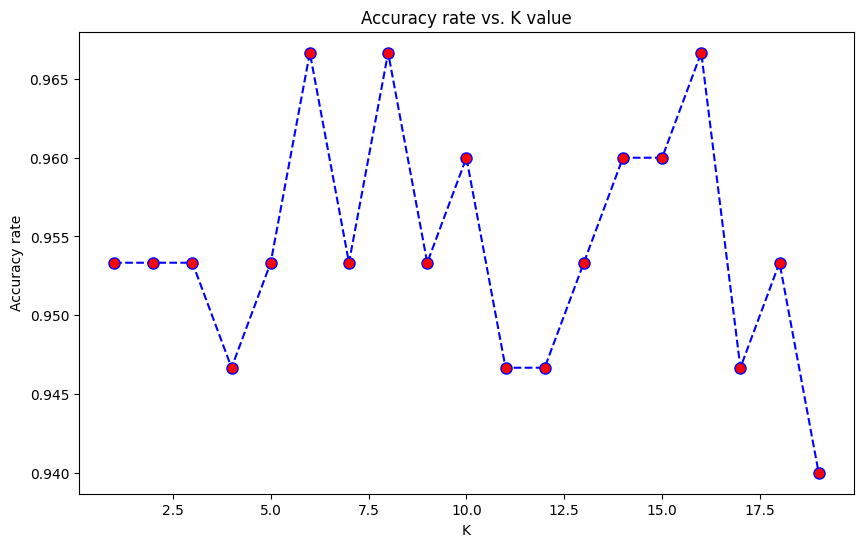

In [525]:
plt.figure(figsize=(10, 6))
#plt.plot(range(1, 20), error_rate, color ='blue', linestyle='dashed', markersize=10, marker='o', markerfacecolor='red')
plt.plot(range(1, 20), accuracy_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=8)
plt.title('Accuracy rate vs. K value')
plt.xlabel('K')
plt.ylabel('Accuracy rate')
plt.show()

In [526]:
k = 6
neigh = KNeighborsClassifier(n_neighbors = k, metric='euclidean').fit(x_train, y_train)
neigh

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [527]:
from sklearn.metrics import accuracy_score, classification_report
pred = neigh.predict(x_test)
s1 = accuracy_score(y_test, pred)
s1

1.0

In [528]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Principal Component Analysis

In [529]:
from sklearn.decomposition import PCA

In [530]:
# Normalising iris_df
scaled_data = scaler.fit_transform(iris_df)
scaled_data = pd.DataFrame(scaled_data, columns=iris_df.columns)
scaled_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,-1.224745
1,-1.143017,-0.131979,-1.340227,-1.315444,-1.224745
2,-1.385353,0.328414,-1.397064,-1.315444,-1.224745
3,-1.506521,0.098217,-1.283389,-1.315444,-1.224745
4,-1.021849,1.249201,-1.340227,-1.315444,-1.224745


In [531]:
n = scaled_data.shape[1]
n

5

In [532]:
pca = PCA(n_components=n, random_state=1)
data_pca1 = pd.DataFrame(pca.fit_transform(scaled_data))
data_pca1.head()

,0,1,2,3,4
0,-2.576120,0.474499,-0.054364,-0.103224,0.032274
1,-2.415322,-0.678092,-0.203080,-0.064962,0.107023
2,-2.659333,-0.348282,0.112681,-0.046176,0.032555
3,-2.601991,-0.603306,0.134288,-0.000629,-0.066072
4,-2.683744,0.640220,0.102711,-0.086924,-0.028450


In [533]:
exp_var = pca.explained_variance_ratio_
exp_var

array([0.76740358, 0.18282727, 0.03724523, 0.00841722, 0.0041067 ])

Text(0, 0.5, 'Cumulative explained variance')

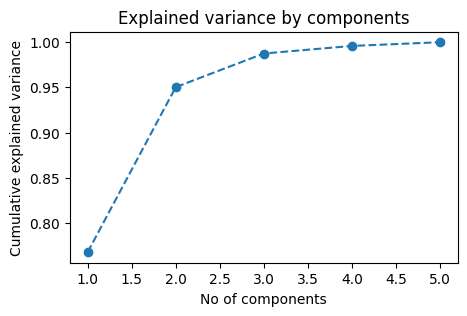

In [534]:
plt.figure(figsize=(5, 3))
plt.plot(range(1, n+1), exp_var.cumsum(), marker='o', linestyle='--')
plt.title("Explained variance by components")
plt.xlabel("No of components")
plt.ylabel("Cumulative explained variance")

In [535]:
sum = 0
for ix, i in enumerate(exp_var):
    sum += i
    if sum>0.90:
        print("No of PCs that explain atleast 90% variance:", ix+1)
        break

No of PCs that explain atleast 90% variance: 2


In [536]:
pc_comps = ['pc1', 'pc2']
data_pca = pd.DataFrame(np.round(pca.components_[:2, :], 2), index=pc_comps)
data_pca.T

,pc1,pc2
0,0.44,0.38
1,-0.23,0.92
2,0.51,0.03
3,0.50,0.07
4,0.49,-0.01


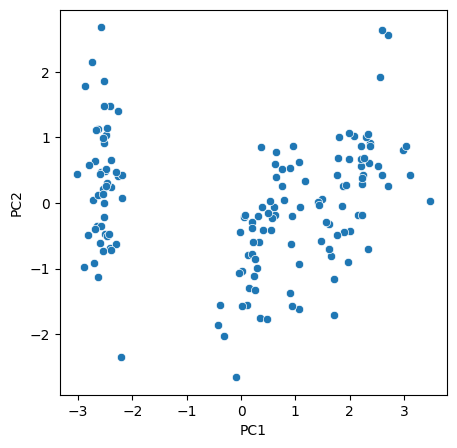

In [537]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=data_pca1[0], y=data_pca1[1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [565]:
data_pca1['target'] = y
data_pca1.head()

,0,1,2,3,4,target
0,-2.576120,0.474499,-0.054364,-0.103224,0.032274,0
1,-2.415322,-0.678092,-0.203080,-0.064962,0.107023,0
2,-2.659333,-0.348282,0.112681,-0.046176,0.032555,0
3,-2.601991,-0.603306,0.134288,-0.000629,-0.066072,0
4,-2.683744,0.640220,0.102711,-0.086924,-0.028450,0


Text(0, 0.5, 'PC2')

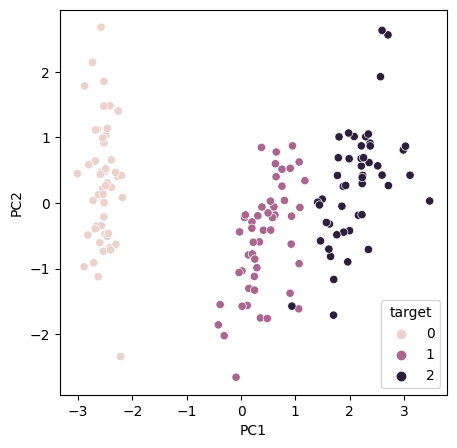

In [566]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=data_pca1, x=data_pca1[0], y = data_pca1[1], hue='target')
plt.xlabel("PC1")
plt.ylabel("PC2")

#### Visualising KNN boundary and full data set

In [567]:
x_train, x_test, y_train, y_test = train_test_split(data_pca1.iloc[:, :2], data_pca1.iloc[:, -1], test_size=0.2, random_state=0)

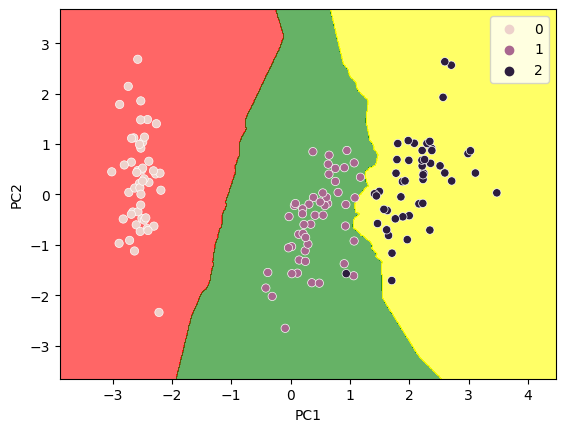

In [568]:
from matplotlib.colors import ListedColormap
# Define x_set and y_set for plotting
x_set, y_set = x_train, y_train

# Generate a meshgrid for decision boundary visualization
x1, x2 = np.meshgrid(np.arange(start=x_set.iloc[:, 0].min() - 1, stop=x_set.iloc[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set.iloc[:, 1].min() - 1, stop=x_set.iloc[:, 1].max() + 1, step=0.01))

# Create a contour plot for the decision boundary
plt.contourf(x1, 
             x2, 
             KNeighborsClassifier(n_neighbors=6).fit(x_train, y_train).predict(
                 np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.60, 
             cmap=ListedColormap(('red', 'green', 'yellow'))
            )

# Set plot limits
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

# Scatter plot for data points
sns.scatterplot(data=data_pca1, x=data_pca1[0], y = data_pca1[1], hue='target')

# Set plot titles and labels
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

### t-SNE

In [569]:
data_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,-1.224745
1,-1.143017,-0.131979,-1.340227,-1.315444,-1.224745
2,-1.385353,0.328414,-1.397064,-1.315444,-1.224745
3,-1.506521,0.098217,-1.283389,-1.315444,-1.224745
4,-1.021849,1.249201,-1.340227,-1.315444,-1.224745


In [570]:
from sklearn.manifold import TSNE
for i in range(10, 50):
    tsne = TSNE(n_components=2, random_state=0, perplexity=i)
    data_tsne = tsne.fit_transform(data_scaled)

data_tsne[0:5]

array([[-10.195841 ,  -2.7369184],
       [ -8.795552 ,  -2.7610965],
       [ -9.272543 ,  -2.2591672],
       [ -8.984137 ,  -2.2258291],
       [-10.416842 ,  -2.3319168]], dtype=float32)

In [571]:
data_tsne.shape

(150, 2)

In [574]:
data_tsne = pd.DataFrame(data=data_tsne, columns=['component 1', 'component 2'])
data_tsne['target'] = y
data_tsne.head()

,component 1,component 2,target
0,-10.195841,-2.736918,0
1,-8.795552,-2.761096,0
2,-9.272543,-2.259167,0
3,-8.984137,-2.225829,0
4,-10.416842,-2.331917,0


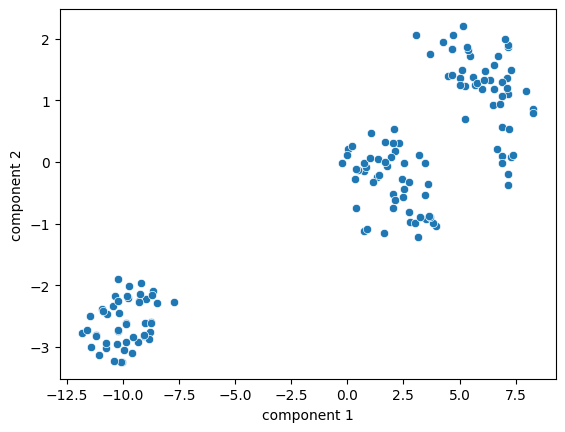

In [573]:
sns.scatterplot(x=data_tsne.iloc[:, 0], y=data_tsne.iloc[:, 1])
plt.show()

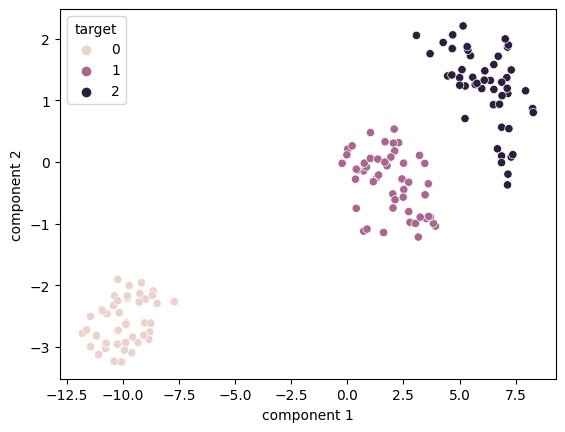

In [575]:
sns.scatterplot(x=data_tsne.iloc[:, 0], y=data_tsne.iloc[:, 1], hue=data_tsne.target)
plt.show()

#### Visualising KNN boundary with full dataset

In [576]:
x_train, x_test, y_train, y_test = train_test_split(data_tsne.iloc[:, :2], data_tsne.iloc[:, -1], test_size=0.2, random_state=0)

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


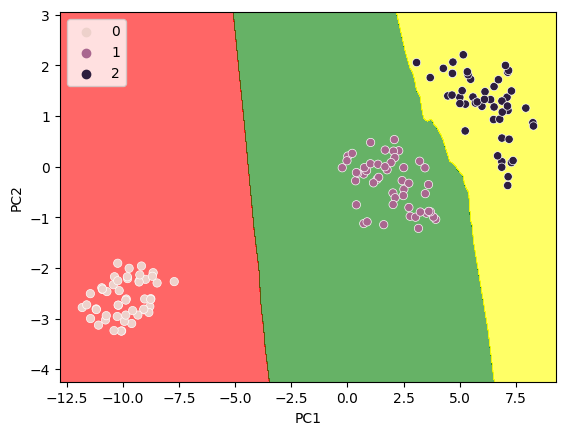

In [578]:
# Define x_set and y_set for plotting
x_set, y_set = x_train, y_train

# Generate a meshgrid for decision boundary visualization
x1, x2 = np.meshgrid(np.arange(start=x_set.iloc[:, 0].min() - 1, stop=x_set.iloc[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set.iloc[:, 1].min() - 1, stop=x_set.iloc[:, 1].max() + 1, step=0.01))

# Create a contour plot for the decision boundary
plt.contourf(x1, 
             x2, 
             KNeighborsClassifier(n_neighbors=6).fit(x_train, y_train).predict(
                 np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.60, 
             cmap=ListedColormap(('red', 'green', 'yellow'))
            )

# Set plot limits
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

# Scatter plot for data points
sns.scatterplot(x=data_tsne.iloc[:, 0], y=data_tsne.iloc[:, 1], hue=data_tsne.target)

# Set plot titles and labels
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()